In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import catboost
%matplotlib inline

In [2]:
sendy_train = pd.read_csv('Train.csv')
sendy_test = pd.read_csv('Test.csv')

In [3]:
sendy_train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [4]:
sendy_train.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [5]:
sendy_test.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long
count,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,5631.000000,199.000000,7068.000000,7068.000000,7068.000000,7068.000000
mean,2.752122,15.621817,3.249859,15.621817,3.249859,15.621817,3.249859,15.621817,3.249859,9.458970,23.246120,6.651759,-1.282043,36.811148,-1.282255,36.811326
std,0.624000,8.776650,1.580926,8.776650,1.580926,8.776650,1.580926,8.776650,1.580926,5.575689,3.591161,14.085439,0.030044,0.037962,0.034236,0.043507
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.200000,0.100000,-1.433512,36.653828,-1.422652,36.639195
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.100000,-1.301201,36.784605,-1.300921,36.786546
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.400000,2.900000,-1.281301,36.807219,-1.283219,36.807927
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.900000,4.950000,-1.257274,36.829716,-1.261256,36.828195
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,47.000000,32.100000,99.100000,-1.148352,36.991046,-1.030225,37.018958


In [6]:
sendy_train['Precipitation in millimeters']= sendy_train['Precipitation in millimeters'].fillna(0)
sendy_test['Precipitation in millimeters']= sendy_test['Precipitation in millimeters'].fillna(0)

In [7]:
sendy_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [8]:
sendy_train['Temperature'].mean()

23.25888921888938

In [9]:
sendy_train['Temperature'].fillna(sendy_train['Temperature'].mean(),inplace=True)
sendy_test['Temperature'].fillna(sendy_test['Temperature'].mean(),inplace=True)

In [10]:
sendy_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

In [11]:
sendy_test[['Temperature']].mean()

Temperature    23.24612
dtype: float64

In [12]:
sendy_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

In [13]:
Riders= pd.read_csv('Riders.csv')
sendy_train= pd.merge(left=sendy_train, right=Riders, how= 'left',left_on='Rider Id',right_on='Rider Id')
sendy_test= pd.merge(left=sendy_test, right=Riders, how= 'left',left_on='Rider Id',right_on='Rider Id')

In [14]:
sendy_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [15]:
from datetime import date
sendy_train['pickup_time']= pd.to_datetime(sendy_train['Pickup - Time'])
sendy_train['arrival_at_pickup_time']= pd.to_datetime(sendy_train['Arrival at Pickup - Time'])
sendy_train['placement_time']= pd.to_datetime(sendy_train['Placement - Time'])
sendy_train['confirmation_time']= pd.to_datetime(sendy_train['Confirmation - Time'])


sendy_test['pickup_time']= pd.to_datetime(sendy_test['Pickup - Time'])
sendy_test['arrival_at_pickup_time']= pd.to_datetime(sendy_test['Arrival at Pickup - Time'])
sendy_test['placement_time']= pd.to_datetime(sendy_test['Placement - Time'])
sendy_test['confirmation_time']= pd.to_datetime(sendy_test['Confirmation - Time'])


In [16]:
sendy_train['time_from_arrival_at_pickup_till_pickup'] = sendy_train['pickup_time']-sendy_train['arrival_at_pickup_time']
sendy_train['time_from_arrival_at_pickup_till_pickup'] = sendy_train['time_from_arrival_at_pickup_till_pickup']/np.timedelta64(1, 's')
sendy_train['time_from_placement_to_pickup'] = sendy_train['pickup_time']-sendy_train['placement_time']
sendy_train['time_from_placement_to_pickup']= sendy_train['time_from_placement_to_pickup']/np.timedelta64(1,'s')

sendy_test['time_from_arrival_at_pickup_till_pickup'] = sendy_test['pickup_time']-sendy_test['arrival_at_pickup_time']
sendy_test['time_from_arrival_at_pickup_till_pickup'] = sendy_test['time_from_arrival_at_pickup_till_pickup']/np.timedelta64(1, 's')
sendy_test['time_from_placement_to_pickup'] = sendy_test['pickup_time']-sendy_test['placement_time']
sendy_test['time_from_placement_to_pickup']= sendy_test['time_from_placement_to_pickup']/np.timedelta64(1,'s')

In [17]:
sendy_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 39 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Order No                                   21201 non-null  object        
 1   User Id                                    21201 non-null  object        
 2   Vehicle Type                               21201 non-null  object        
 3   Platform Type                              21201 non-null  int64         
 4   Personal or Business                       21201 non-null  object        
 5   Placement - Day of Month                   21201 non-null  int64         
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64         
 7   Placement - Time                           21201 non-null  object        
 8   Confirmation - Day of Month                21201 non-null  int64         
 9   Confirmation - We

In [18]:
sendy_train.drop(['Placement - Time','Pickup - Time', 'Arrival at Pickup - Time','Confirmation - Time'], axis= 1, inplace = True)
sendy_test.drop(['Placement - Time','Pickup - Time', 'Arrival at Pickup - Time','Confirmation - Time'], axis= 1, inplace = True)

In [19]:
sendy_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Order No                                   21201 non-null  object        
 1   User Id                                    21201 non-null  object        
 2   Vehicle Type                               21201 non-null  object        
 3   Platform Type                              21201 non-null  int64         
 4   Personal or Business                       21201 non-null  object        
 5   Placement - Day of Month                   21201 non-null  int64         
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64         
 7   Confirmation - Day of Month                21201 non-null  int64         
 8   Confirmation - Weekday (Mo = 1)            21201 non-null  int64         
 9   Arrival at Pickup

In [20]:
#sendy_train['arrival_at_destination_time']= pd.to_datetime(sendy_train['Arrival at Destination - Time'])

#sendy_test['arrival_at_destination_time']= pd.to_datetime(sendy_test['Arrival at Destination - Time'])

In [21]:
sendy_train.drop(['Arrival at Destination - Time'], axis= 1, inplace = True)


In [22]:
sendy_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Order No                                   21201 non-null  object        
 1   User Id                                    21201 non-null  object        
 2   Vehicle Type                               21201 non-null  object        
 3   Platform Type                              21201 non-null  int64         
 4   Personal or Business                       21201 non-null  object        
 5   Placement - Day of Month                   21201 non-null  int64         
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64         
 7   Confirmation - Day of Month                21201 non-null  int64         
 8   Confirmation - Weekday (Mo = 1)            21201 non-null  int64         
 9   Arrival at Pickup

In [23]:
sendy_train['Platform Type'].unique()

array([3, 1, 2, 4], dtype=int64)

In [24]:
import seaborn as sns

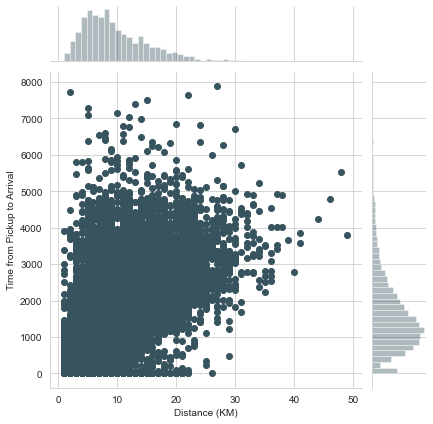

In [25]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='Distance (KM)',y='Time from Pickup to Arrival',data=sendy_train)

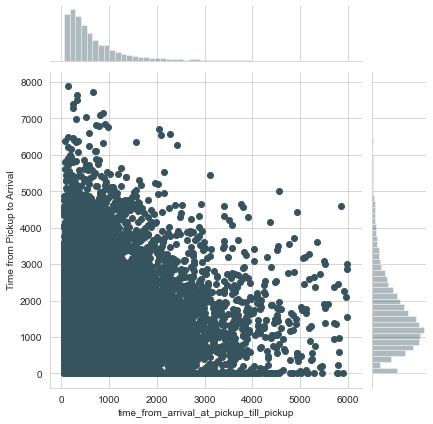

In [26]:
sns.jointplot(x='time_from_arrival_at_pickup_till_pickup',y='Time from Pickup to Arrival',data=sendy_train)

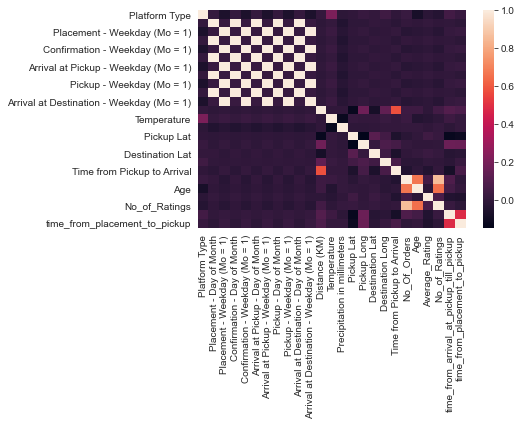

In [27]:
sns.heatmap(sendy_train.corr())

In [28]:
print(sendy_train.corr())

                                           Platform Type  \
Platform Type                                   1.000000   
Placement - Day of Month                        0.012764   
Placement - Weekday (Mo = 1)                   -0.058038   
Confirmation - Day of Month                     0.012770   
Confirmation - Weekday (Mo = 1)                -0.058005   
Arrival at Pickup - Day of Month                0.012770   
Arrival at Pickup - Weekday (Mo = 1)           -0.058005   
Pickup - Day of Month                           0.012770   
Pickup - Weekday (Mo = 1)                      -0.058005   
Arrival at Destination - Day of Month           0.012770   
Arrival at Destination - Weekday (Mo = 1)      -0.058005   
Distance (KM)                                   0.005528   
Temperature                                     0.211494   
Precipitation in millimeters                   -0.011401   
Pickup Lat                                     -0.002742   
Pickup Long                             

In [29]:
dummies= pd.get_dummies(sendy_train['Personal or Business'])

dummies_test= pd.get_dummies(sendy_test['Personal or Business'])

In [30]:
sendy_train = pd.concat([sendy_train, dummies],axis=1)

sendy_test = pd.concat([sendy_test, dummies_test],axis=1)

In [31]:
sendy_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Order No                                   21201 non-null  object        
 1   User Id                                    21201 non-null  object        
 2   Vehicle Type                               21201 non-null  object        
 3   Platform Type                              21201 non-null  int64         
 4   Personal or Business                       21201 non-null  object        
 5   Placement - Day of Month                   21201 non-null  int64         
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64         
 7   Confirmation - Day of Month                21201 non-null  int64         
 8   Confirmation - Weekday (Mo = 1)            21201 non-null  int64         
 9   Arrival at Pickup

In [32]:
sendy_train.drop(['Order No','User Id','Vehicle Type'],axis=1,inplace=True)

sendy_test.drop(['Order No','User Id','Vehicle Type'],axis=1,inplace=True)

In [33]:
from sklearn import preprocessing
from sklearn import linear_model
import sklearn.metrics as skl

In [34]:
sendy_train['time_from_pickup_to_arrival']= sendy_train['Time from Pickup to Arrival']

In [35]:
sendy_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7068 entries, 0 to 7067
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Platform Type                            7068 non-null   int64         
 1   Personal or Business                     7068 non-null   object        
 2   Placement - Day of Month                 7068 non-null   int64         
 3   Placement - Weekday (Mo = 1)             7068 non-null   int64         
 4   Confirmation - Day of Month              7068 non-null   int64         
 5   Confirmation - Weekday (Mo = 1)          7068 non-null   int64         
 6   Arrival at Pickup - Day of Month         7068 non-null   int64         
 7   Arrival at Pickup - Weekday (Mo = 1)     7068 non-null   int64         
 8   Pickup - Day of Month                    7068 non-null   int64         
 9   Pickup - Weekday (Mo = 1)                

In [36]:
sendy_train.drop(['pickup_time','arrival_at_pickup_time','placement_time','confirmation_time'],axis=1, inplace=True)

sendy_test.drop(['pickup_time','arrival_at_pickup_time','placement_time','confirmation_time'],axis=1, inplace=True)

In [37]:
y=sendy_train['time_from_pickup_to_arrival']


In [38]:
sendy_train.drop(['Personal or Business','Rider Id','Time from Pickup to Arrival','Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)'],axis=1,inplace=True)

sendy_test.drop(['Personal or Business','Rider Id'],axis=1,inplace=True)

In [39]:
sendy_test.head()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),...,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,time_from_arrival_at_pickup_till_pickup,time_from_placement_to_pickup,Business,Personal
0,3,27,3,27,3,27,3,27,3,8,...,-1.305249,36.822390,439,1511,13.3,171,823.0,1357.0,1,0
1,3,17,5,17,5,17,5,17,5,5,...,-1.277007,36.823907,488,273,14.4,45,310.0,1682.0,1,0
2,3,27,4,27,4,27,4,27,4,5,...,-1.276574,36.851365,833,460,13.1,67,1474.0,2980.0,1,0
3,3,17,1,17,1,17,1,17,1,5,...,-1.303382,36.790658,487,560,13.7,44,851.0,1517.0,1,0
4,3,11,2,11,2,11,2,11,2,6,...,-1.266467,36.792161,4761,1120,14.1,1010,525.0,1536.0,1,0


In [40]:
#xtra= sendy_train.drop(['time_from_pickup_to_arrival'],axis=1,inplace=True)
#xte= xte.apply(pd.to_numeric, errors='coerce')
#y= y.apply(pd.to_numeric, errors='coerce')
#xtra.fillna(0, inplace=True)
#xte.fillna(0, inplace=True)

In [41]:
sendy_train.head()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),...,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,time_from_arrival_at_pickup_till_pickup,time_from_placement_to_pickup,Business,Personal,time_from_pickup_to_arrival
0,3,9,5,9,5,9,5,9,5,4,...,36.829741,1637,1309,13.8,549,1363.0,3104.0,1,0,745
1,3,12,5,12,5,12,5,12,5,16,...,36.814358,396,339,13.6,69,227.0,1673.0,0,1,1993
2,3,30,2,30,2,30,2,30,2,3,...,36.828195,1023,242,12.5,114,209.0,818.0,1,0,455
3,3,15,5,15,5,15,5,15,5,9,...,36.795063,886,283,14.5,113,310.0,1052.0,1,0,1341
4,1,13,1,13,1,13,1,13,1,9,...,36.809817,2311,872,14.1,533,90.0,605.0,0,1,1214


In [42]:
sendy_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Platform Type                            21201 non-null  int64  
 1   Placement - Day of Month                 21201 non-null  int64  
 2   Placement - Weekday (Mo = 1)             21201 non-null  int64  
 3   Confirmation - Day of Month              21201 non-null  int64  
 4   Confirmation - Weekday (Mo = 1)          21201 non-null  int64  
 5   Arrival at Pickup - Day of Month         21201 non-null  int64  
 6   Arrival at Pickup - Weekday (Mo = 1)     21201 non-null  int64  
 7   Pickup - Day of Month                    21201 non-null  int64  
 8   Pickup - Weekday (Mo = 1)                21201 non-null  int64  
 9   Distance (KM)                            21201 non-null  int64  
 10  Temperature                              21201

In [43]:
sendy_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7068 entries, 0 to 7067
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Platform Type                            7068 non-null   int64  
 1   Placement - Day of Month                 7068 non-null   int64  
 2   Placement - Weekday (Mo = 1)             7068 non-null   int64  
 3   Confirmation - Day of Month              7068 non-null   int64  
 4   Confirmation - Weekday (Mo = 1)          7068 non-null   int64  
 5   Arrival at Pickup - Day of Month         7068 non-null   int64  
 6   Arrival at Pickup - Weekday (Mo = 1)     7068 non-null   int64  
 7   Pickup - Day of Month                    7068 non-null   int64  
 8   Pickup - Weekday (Mo = 1)                7068 non-null   int64  
 9   Distance (KM)                            7068 non-null   int64  
 10  Temperature                              7068 no

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sendy_train.drop(['time_from_pickup_to_arrival'],axis=1), y, test_size=0.2, random_state=101)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lm = LinearRegression()

In [47]:
lm.fit(x_train,y_train)

LinearRegression()

In [48]:
from sklearn import metrics as sklm
import math

In [49]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lm.predict(x_test) 
print_metrics(y_test, y_score, 9) 

Mean Square Error      = 589150.203247882
Root Mean Square Error = 767.5612048871947
Mean Absolute Error    = 547.7953374972791
Median Absolute Error  = 405.9618708521739
R^2                    = 0.3794188426818117
Adjusted R^2           = 0.37824572140143703


In [50]:
from catboost import CatBoostRegressor

In [51]:
cat_reg = CatBoostRegressor(iterations=1000,
                          learning_rate=1,
                          depth=4)

In [52]:
cat_reg.fit(x_train,y_train)

0:	learn: 822.0425005	total: 156ms	remaining: 2m 35s
1:	learn: 799.6881659	total: 170ms	remaining: 1m 24s
2:	learn: 791.6649302	total: 181ms	remaining: 1m
3:	learn: 783.9170981	total: 187ms	remaining: 46.6s
4:	learn: 777.1694433	total: 193ms	remaining: 38.5s
5:	learn: 772.7219432	total: 200ms	remaining: 33.1s
6:	learn: 768.3554015	total: 206ms	remaining: 29.3s
7:	learn: 764.7455530	total: 210ms	remaining: 26.1s
8:	learn: 762.4526563	total: 214ms	remaining: 23.5s
9:	learn: 760.7966622	total: 217ms	remaining: 21.5s
10:	learn: 757.9392362	total: 221ms	remaining: 19.9s
11:	learn: 755.8296882	total: 224ms	remaining: 18.5s
12:	learn: 753.7896670	total: 228ms	remaining: 17.3s
13:	learn: 751.3877564	total: 231ms	remaining: 16.3s
14:	learn: 749.7046785	total: 235ms	remaining: 15.4s
15:	learn: 748.0924817	total: 238ms	remaining: 14.6s
16:	learn: 744.3415868	total: 242ms	remaining: 14s
17:	learn: 742.7382808	total: 245ms	remaining: 13.4s
18:	learn: 741.1870770	total: 248ms	remaining: 12.8s
19:	le

188:	learn: 609.3364014	total: 836ms	remaining: 3.59s
189:	learn: 608.6275462	total: 840ms	remaining: 3.58s
190:	learn: 608.3029396	total: 844ms	remaining: 3.57s
191:	learn: 608.0608323	total: 847ms	remaining: 3.56s
192:	learn: 607.6282432	total: 851ms	remaining: 3.56s
193:	learn: 607.2447215	total: 854ms	remaining: 3.55s
194:	learn: 606.6924814	total: 858ms	remaining: 3.54s
195:	learn: 606.2506242	total: 861ms	remaining: 3.53s
196:	learn: 605.5922350	total: 865ms	remaining: 3.53s
197:	learn: 604.9058782	total: 869ms	remaining: 3.52s
198:	learn: 604.3011968	total: 872ms	remaining: 3.51s
199:	learn: 603.9644985	total: 875ms	remaining: 3.5s
200:	learn: 603.4604893	total: 879ms	remaining: 3.49s
201:	learn: 603.1418987	total: 882ms	remaining: 3.48s
202:	learn: 602.6996779	total: 886ms	remaining: 3.48s
203:	learn: 602.0197918	total: 889ms	remaining: 3.47s
204:	learn: 601.3748211	total: 892ms	remaining: 3.46s
205:	learn: 600.8780520	total: 896ms	remaining: 3.45s
206:	learn: 600.0446362	total

382:	learn: 527.4735768	total: 1.53s	remaining: 2.46s
383:	learn: 527.0616635	total: 1.53s	remaining: 2.46s
384:	learn: 526.3449030	total: 1.54s	remaining: 2.46s
385:	learn: 525.9197008	total: 1.54s	remaining: 2.45s
386:	learn: 525.6845897	total: 1.54s	remaining: 2.45s
387:	learn: 525.4420205	total: 1.55s	remaining: 2.44s
388:	learn: 525.1266663	total: 1.55s	remaining: 2.44s
389:	learn: 524.8889440	total: 1.55s	remaining: 2.43s
390:	learn: 524.6557574	total: 1.56s	remaining: 2.44s
391:	learn: 524.2766725	total: 1.57s	remaining: 2.43s
392:	learn: 523.9348437	total: 1.57s	remaining: 2.43s
393:	learn: 523.6834604	total: 1.58s	remaining: 2.42s
394:	learn: 523.5646177	total: 1.58s	remaining: 2.42s
395:	learn: 523.3349450	total: 1.58s	remaining: 2.42s
396:	learn: 523.0579900	total: 1.59s	remaining: 2.41s
397:	learn: 522.7516203	total: 1.59s	remaining: 2.41s
398:	learn: 522.4403652	total: 1.59s	remaining: 2.4s
399:	learn: 522.1132170	total: 1.6s	remaining: 2.4s
400:	learn: 521.9127389	total: 

564:	learn: 471.0153056	total: 2.2s	remaining: 1.7s
565:	learn: 470.8367080	total: 2.21s	remaining: 1.69s
566:	learn: 470.4951448	total: 2.21s	remaining: 1.69s
567:	learn: 470.2195004	total: 2.21s	remaining: 1.68s
568:	learn: 469.9793506	total: 2.22s	remaining: 1.68s
569:	learn: 469.7134517	total: 2.22s	remaining: 1.68s
570:	learn: 469.4885375	total: 2.23s	remaining: 1.67s
571:	learn: 469.1824375	total: 2.23s	remaining: 1.67s
572:	learn: 468.8877467	total: 2.24s	remaining: 1.67s
573:	learn: 468.6979523	total: 2.24s	remaining: 1.66s
574:	learn: 468.3890266	total: 2.24s	remaining: 1.66s
575:	learn: 468.0891112	total: 2.25s	remaining: 1.65s
576:	learn: 467.9091882	total: 2.25s	remaining: 1.65s
577:	learn: 467.5241616	total: 2.25s	remaining: 1.65s
578:	learn: 467.1041833	total: 2.26s	remaining: 1.64s
579:	learn: 466.8814096	total: 2.26s	remaining: 1.64s
580:	learn: 466.6146883	total: 2.27s	remaining: 1.63s
581:	learn: 466.1902105	total: 2.27s	remaining: 1.63s
582:	learn: 465.9048590	total:

753:	learn: 424.7279986	total: 2.89s	remaining: 943ms
754:	learn: 424.5635618	total: 2.89s	remaining: 939ms
755:	learn: 424.2082242	total: 2.9s	remaining: 935ms
756:	learn: 424.0831061	total: 2.9s	remaining: 931ms
757:	learn: 423.9377324	total: 2.9s	remaining: 927ms
758:	learn: 423.2674911	total: 2.91s	remaining: 923ms
759:	learn: 423.0878271	total: 2.91s	remaining: 919ms
760:	learn: 422.8423667	total: 2.91s	remaining: 915ms
761:	learn: 422.6683851	total: 2.92s	remaining: 911ms
762:	learn: 422.3993821	total: 2.92s	remaining: 908ms
763:	learn: 422.1971754	total: 2.92s	remaining: 904ms
764:	learn: 421.9799848	total: 2.93s	remaining: 900ms
765:	learn: 421.7872682	total: 2.93s	remaining: 896ms
766:	learn: 421.6741080	total: 2.94s	remaining: 892ms
767:	learn: 421.3567405	total: 2.94s	remaining: 888ms
768:	learn: 421.0913656	total: 2.94s	remaining: 884ms
769:	learn: 420.9970947	total: 2.95s	remaining: 880ms
770:	learn: 420.8477105	total: 2.95s	remaining: 877ms
771:	learn: 420.5746688	total: 

946:	learn: 385.0001876	total: 3.57s	remaining: 200ms
947:	learn: 384.3805029	total: 3.57s	remaining: 196ms
948:	learn: 384.1714833	total: 3.58s	remaining: 192ms
949:	learn: 383.9481725	total: 3.58s	remaining: 188ms
950:	learn: 383.7455796	total: 3.58s	remaining: 185ms
951:	learn: 383.6399399	total: 3.59s	remaining: 181ms
952:	learn: 383.4916193	total: 3.59s	remaining: 177ms
953:	learn: 383.3440989	total: 3.6s	remaining: 173ms
954:	learn: 383.2327216	total: 3.6s	remaining: 170ms
955:	learn: 383.1271174	total: 3.6s	remaining: 166ms
956:	learn: 382.9485740	total: 3.61s	remaining: 162ms
957:	learn: 382.6402766	total: 3.61s	remaining: 158ms
958:	learn: 382.3959875	total: 3.61s	remaining: 154ms
959:	learn: 382.1699359	total: 3.62s	remaining: 151ms
960:	learn: 381.9002031	total: 3.62s	remaining: 147ms
961:	learn: 381.6167424	total: 3.62s	remaining: 143ms
962:	learn: 381.3822783	total: 3.63s	remaining: 139ms
963:	learn: 381.2764013	total: 3.63s	remaining: 136ms
964:	learn: 381.0347764	total: 

In [53]:
preds = cat_reg.predict(sendy_test)

In [54]:
cat_reg.score(x_train,y_train)

0.8575463624526242

In [55]:
sendy_newtest= pd.read_csv('test.csv')

In [56]:
sendy_newtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

In [57]:
preds = preds.astype(np.int)
submission = pd.DataFrame({'Time from Pickup to Arrival':preds,'Order No':sendy_newtest['Order No']})

In [58]:
submission.to_csv('sendy_result.csv',index=False)